In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import glob

## Creación del dataframe con todos los datos por hora

In [116]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada hora del día

def nuevoFrame(mesActual):
    i = 0
    j = 0
    energia = []
    irradiacion = []
    fechas = []
    horas = []
    temperatura = []
    try:
        while i<len(mesActual):
            fechas.append(mesActual['Fecha'][i])
            horas.append(mesActual['Hora'][i])
            energia.append(mesActual['Potencia [kW]'][i:i+12].sum()/12)
            irradiacion.append(mesActual['Insolacion [W/m2]'][i:i+12].sum()/12)
            temperatura.append(mesActual['Temperatura de modulos [C]'][i:i+12].sum()/12)
            i+=12
        datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Energia [kWh]':energia,'Irradiacion [Wh/m2]':irradiacion,'Temperatura de modulos [C]':temperatura})
        return datos
    except:
        pass

In [73]:
# Se leen los diferentes archivos csv que existen en la carpeta actual
archivos = ['Octubre 2019.csv','Noviembre 2019.csv', 'Diciembre 2019.csv', 'Enero 2020.csv', 'Febrero 2020.csv',
            'Marzo 2020.csv','Abril 2020.csv', 'Mayo 2020.csv','Junio 2020.csv', 'Julio 2020.csv', 'Agosto 2020.csv',
             'Septiembre 2020.csv','Octubre 2020.csv','Noviembre 2020.csv', 'Diciembre 2020.csv']
len(archivos)

15

### Nuevo dataframe:

In [117]:
# Se leen los diferentes archivos y se ejecuta sobre cada uno la función 'nuevoFrame'
# Luego se concatenan cada uno de estos dataFrames en uno solo
inicio = 0

for name in archivos:
    try:
        mesActual = pd.read_csv(name)      #Lectura
        mesActual = nuevoFrame(mesActual)  #Ejecución
    except:
        pass
    if inicio == 0:
        todoporHora = mesActual
    else:
        todoporHora = pd.concat([todoporHora,mesActual])
    inicio+=1
todoporHora.set_index(np.array(range(len(todoporHora))),inplace = True)

In [75]:
inicio

15

In [118]:
todoporHora

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2],Temperatura de modulos [C]
0,1/10/2019,6:00,2.334167,34.787500,12.970833
1,1/10/2019,7:00,15.220000,242.950833,23.139167
2,1/10/2019,8:00,34.786667,522.285000,35.152500
3,1/10/2019,9:00,36.830000,503.754167,31.743333
4,1/10/2019,10:00,30.043333,377.405833,28.122500
...,...,...,...,...,...
5491,31/12/2020,13:00,3.046667,75.204167,18.377500
5492,31/12/2020,14:00,0.524167,19.589167,14.272500
5493,31/12/2020,15:00,0.206667,11.668333,13.439167
5494,31/12/2020,16:00,0.219167,12.330833,14.020000


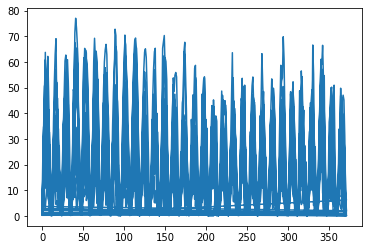

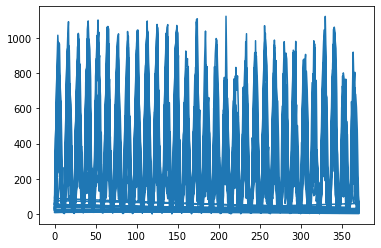

In [77]:
dataFrame['Energia [kWh]'].plot()
plt.show()
dataFrame['Irradiacion [Wh/m2]'].plot()

In [78]:
horas = dataFrame['Hora'].unique()
horas

array(['6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00'], dtype=object)

In [9]:
irr_prom = []
ene_prom = []

irr_std = []
ene_std = []

for h in horas:
    df = dataFrame[dataFrame['Hora']==h]
    
    energy = df['Energia [kWh]'].mean()
    irradiance  =df['Irradiacion [Wh/m2]'].mean()
    
    energy_std = df['Energia [kWh]'].std()
    irradiance_std  =df['Irradiacion [Wh/m2]'].std()
    
    ene_prom.append(energy)
    irr_prom.append(irradiance)
    
    ene_std.append(energy_std)
    irr_std.append(irradiance_std)


In [10]:
porHora = pd.DataFrame({'Hora':horas,'Energia Prom [kWh]':ene_prom,'Irradiacion Prom [Wh/m2]':irr_prom,
                        'Energia desv [kWh]': ene_std,'Irradiacion desv [Wh/m2]':irr_std})
porHora.to_csv('Estadisticas por hora.csv')

In [123]:
todoporHora = pd.read_csv('Todo por hora.csv')
todoporHora.drop('Unnamed: 0',axis = 1,inplace = True)
todoporHora = todoporHora[todoporHora.Hora != '6:00']
todoporHora = todoporHora[todoporHora.Hora != '17:00']
todoporHora.to_excel('Parafiltrar.xlsx', sheet_name='Parafiltrar')

Hora: 
Entre 6:00 y 17:00
6:00


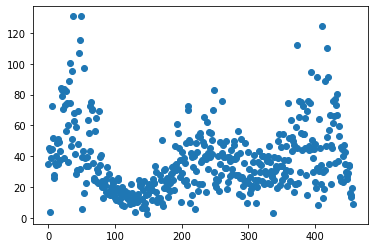

In [12]:
hora = input('Hora: \nEntre 6:00 y 17:00\n')
plt.scatter(range(len(dataFrame[dataFrame['Hora']==hora])),dataFrame[dataFrame['Hora']==hora]['Irradiacion [Wh/m2]'])

In [13]:
promedios = pd.read_csv('Estadisticas por hora.csv')
promedios.drop('Unnamed: 0',axis = 1,inplace = True)
promedios

,Hora,Energia Prom [kWh],Irradiacion Prom [Wh/m2],Energia desv [kWh],Irradiacion desv [Wh/m2]
0,6:00,1.669605,36.732636,1.132852,22.037113
1,7:00,9.283936,189.370182,4.759372,109.302048
2,8:00,19.101243,354.244176,9.229886,176.658672
3,9:00,25.971177,463.021567,11.903278,215.963951
4,10:00,30.415977,530.439156,14.084939,247.390029
5,11:00,31.178832,535.630262,15.108984,263.046497
6,12:00,28.835844,480.730073,15.478485,259.766559
7,13:00,24.735045,350.265122,14.606989,195.562491
8,14:00,19.001918,238.343834,11.545151,150.413175
9,15:00,12.224898,149.608231,8.140235,97.757426


## Filtrado 

In [107]:
filtro1 = []
filtro2 = []
horas = promedios['Hora']

for i in range(len(promedios)):
    sup = promedios['Irradiacion Prom [Wh/m2]'][i] + promedios['Irradiacion desv [Wh/m2]'][i]
    inf = promedios['Irradiacion Prom [Wh/m2]'][i] - promedios['Irradiacion desv [Wh/m2]'][i]
    
    filtro1.append(sup)
    filtro2.append(inf)
filtro = pd.DataFrame({'Hora':horas,'Superior':filtro1,'Inferior':filtro2})
filtro.set_index('Hora', inplace = True)
filtro

,Superior,Inferior
Hora,,
6:00,58.769749,14.695524
7:00,298.672230,80.068134
8:00,530.902847,177.585504
9:00,678.985518,247.057616
10:00,777.829185,283.049127
11:00,798.676759,272.583765
12:00,740.496632,220.963514
13:00,545.827613,154.702631
14:00,388.757009,87.930659


In [114]:
todoporHora[20:25]

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2],Temperatura de modulos [C]
20,2/10/2019,14:00,26.760000,180.745000,26.161667
21,2/10/2019,15:00,8.155000,85.559167,22.281667
22,2/10/2019,16:00,4.940000,60.472500,17.328333
23,2/10/2019,17:00,0.598333,10.561667,15.150833
24,3/10/2019,6:00,0.012500,3.642500,9.808333


In [14]:
rango1 = []
rango2 = []
horas = promedios['Hora']
for i in range(len(promedios)):
    lim1 = promedios['Irradiacion Prom [Wh/m2]'][i] - promedios['Irradiacion desv [Wh/m2]'][i]/2
    lim2 = promedios['Irradiacion Prom [Wh/m2]'][i] + promedios['Irradiacion desv [Wh/m2]'][i]/2
    
    rango1.append(lim1)
    rango2.append(lim2)
rangos = pd.DataFrame({'Hora':horas,'Limite Inf':rango1,'Limite Sup':rango2})
rangos.set_index('Hora',inplace = True)
rangos

,Limite Inf,Limite Sup
Hora,,
6:00,25.714080,47.751193
7:00,134.719158,244.021206
8:00,265.914840,442.573512
9:00,355.039591,571.003542
10:00,406.744141,654.134170
11:00,404.107013,667.153511
12:00,350.846793,610.613352
13:00,252.483876,448.046368
14:00,163.137246,313.550421


In [115]:
m = len(todoporHora)

horas = todoporHora['Hora'].unique()
fechas = todoporHora.Fecha

for h in horas:
    inf = filtro['Inferior'][h]
    sup = filtro['Superior'][h]
    for i in range(len(todoporHora)):
        irr_actual =todoporHora['Irradiacion [Wh/m2]'][i]
        
        if todoporHora['Hora'][i] == h:
            if  irr_actual < inf:
                todoporHora.drop([i],inplace = True)
                
            elif irr_actual > sup:
                todoporHora.drop([i], inplace = True)
                
todoporHora.set_index(np.array(range(len(todoporHora))))

KeyError: 24

# Clasificación

In [126]:
todoporHora = pd.read_csv('Para filtrar.csv')

In [127]:
m = len(todoporHora)

soleados = [0]*m
lluviosos = [0]*m
nubados = [0]*m

horas = todoporHora['Hora'].unique()
fechas = todoporHora.Fecha

for h in horas:
    inf = rangos['Limite Inf'][h]
    sup = rangos['Limite Sup'][h]
    for i in range(len(todoporHora)):
        irr_actual =todoporHora['Irradiacion [Wh/m2]'][i]
        
        if todoporHora['Hora'][i] == h:
            if  irr_actual < inf:
                lluviosos[i] = 1
                
            elif inf < irr_actual < sup:
                nubados[i] = 1
            
            else:
                soleados[i] = 1

clima = pd.DataFrame({'Fecha':fechas,'Hora':todoporHora['Hora'],'Lluvioso':lluviosos, 'Nublado':nubados,'Soleado':soleados})

In [128]:
clima

,Fecha,Hora,Lluvioso,Nublado,Soleado
0,1/10/2019,7:00,0,1,0
1,1/10/2019,8:00,0,0,1
2,1/10/2019,9:00,0,1,0
3,1/10/2019,10:00,1,0,0
4,1/10/2019,11:00,1,0,0
...,...,...,...,...,...
4575,31/12/2020,12:00,1,0,0
4576,31/12/2020,13:00,1,0,0
4577,31/12/2020,14:00,1,0,0
4578,31/12/2020,15:00,1,0,0


(-1.118892723532241, 1.1008996535015352, -1.11140673916611, 1.1135056364927596)

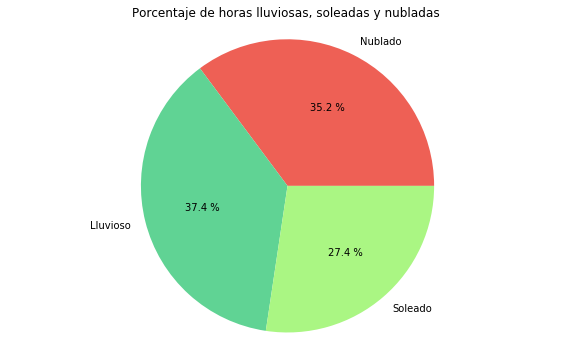

In [19]:
counts = [sum(nubados)/5496, sum(lluviosos)/5496,sum(soleados)/5496]
estado = ['Nublado','Lluvioso','Soleado']

colores = ["#EE6055","#60D394","#AAF683"]

plt.figure(figsize=(10,6))
plt.pie(counts,labels = estado,autopct="%0.1f %%",colors = colores)
plt.title('Porcentaje de horas lluviosas, soleadas y nubladas')
plt.axis('equal')

# Muestra de 5496 datos

In [20]:
horas = clima.Hora.unique()
n = len(horas)
lluvia = [0]*n
sol = [0]*n
nube = [0]*n
for i in range(len(horas)):
    lluvia[i] = clima[clima['Hora']==horas[i]]['Lluvioso'].sum()
    sol[i] = clima[clima['Hora']==horas[i]]['Soleado'].sum()
    nube[i] = clima[clima['Hora']==horas[i]]['Nublado'].sum()
    
climaHora = pd.DataFrame({'Hora':horas,'Lluvioso':lluvia,'Soleado':sol,'Nublado':nube})
climaHora.set_index('Hora',inplace = True)

Text(0, 0.5, 'Frecuencia')

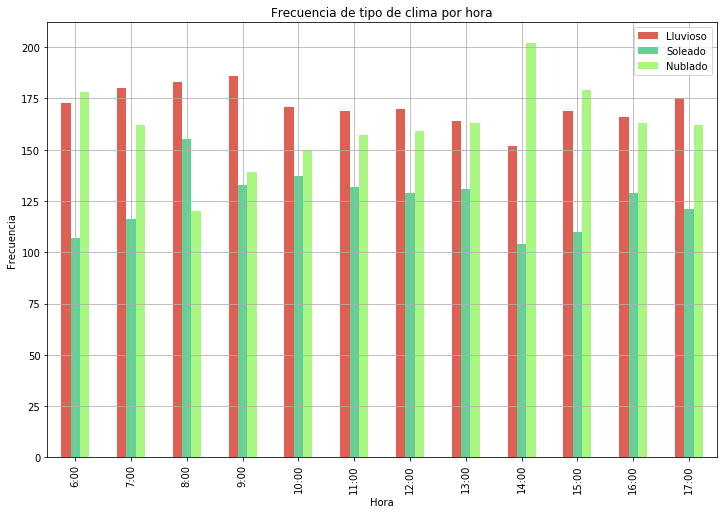

In [21]:
colores = ["#DE6055","#60D394","#AAF683"]
climaHora.plot.bar(figsize = (12,8),grid = True,color = colores)
plt.title('Frecuencia de tipo de clima por hora')
plt.ylabel('Frecuencia')

# DataFrames Finales

In [22]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada uno de los datos 

def nuevoFrame(mesActual):
    i = 0
    j = 0
    energia = []
    irradiacion = []
    fechas = []
    horas = []
    try:
        while i<len(mesActual):
            fechas.append(mesActual['Fecha'][i])
            horas.append(mesActual['Hora'][i])
            energia.append(mesActual['Potencia [kW]'][i:i+12].sum()/12)
            irradiacion.append(mesActual['Insolacion [W/m2]'][i:i+12].sum()/12)
            i+=12
        datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Energia [kWh]':energia,'Irradiacion [Wh/m2]':irradiacion})
        return datos
    except:
        pass

In [23]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada hora del día

def nuevoFrame2(mesActual):
    try:
        fechas = mesActual['Fecha']
        horas = mesActual['Hora']
        energia = mesActual['Potencia [kW]']
        irradiacion = mesActual['Insolacion [W/m2]']
        temperatura = mesActual['Temperatura de modulos [C]']
        datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Potencia [kW]':energia,'Irradiacion [W/m2]':irradiacion,
                              'Temperatura de modulos[C]':temperatura})
        return datos
    except:
        pass

In [24]:
archivos = ['Octubre 2019.csv','Noviembre 2019.csv', 'Diciembre 2019.csv', 'Enero 2020.csv', 'Febrero 2020.csv',
            'Marzo 2020.csv','Abril 2020.csv', 'Mayo 2020.csv','Junio 2020.csv', 'Julio 2020.csv', 'Agosto 2020.csv',
             'Septiembre 2020.csv','Octubre 2020.csv','Noviembre 2020.csv', 'Diciembre 2020.csv']
len(archivos)

15

In [25]:
start = 0
for arch in archivos:
    try:
        df = pd.read_csv(arch)
        df = nuevoFrame2(df)
    except:
        pass
    if start == 0:
        dataFinal= df
    else:
        dataFinal= pd.concat([dataFinal,df])
    start+=1
dataFinal.to_csv('DataFinalBeta.csv')

In [26]:
dataFinal = pd.read_csv('DataFinalBeta.csv')
dataFinal.drop('Unnamed: 0',axis = 1 ,inplace = True)
dataFinal

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
0,1/10/2019,6:00,0.26,8.98,11.66
1,1/10/2019,6:05,0.85,16.87,11.72
2,1/10/2019,6:10,1.78,28.75,11.80
3,1/10/2019,6:15,2.17,33.24,11.92
4,1/10/2019,6:20,2.12,32.35,12.12
...,...,...,...,...,...
65947,31/12/2020,17:35,0.12,9.11,12.93
65948,31/12/2020,17:40,0.11,8.69,12.66
65949,31/12/2020,17:45,0.10,7.89,12.54
65950,31/12/2020,17:50,0.02,5.31,12.50


In [27]:
n = len(clima)
soleado = []
nublado  = []
lluvioso = []

for i in range(n):
    soleado+=[clima['Soleado'][i]]*12
    lluvioso+=[clima['Lluvioso'][i]]*12
    nublado+=[clima['Nublado'][i]]*12

dataFinal['Lluvioso'] = lluvioso
dataFinal['Nublado'] = nublado
dataFinal['Soleado'] = soleado

In [133]:
todoporHora['Lluvioso'] = clima.Lluvioso
todoporHora['Nublado'] = clima.Nublado
todoporHora['Soleado'] = clima.Soleado
todoporHora1 = todoporHora
todoporHora.set_index(np.array(range(len(todoporHora))),inplace = True)
todoporHora.to_csv('Para filtrar.csv')

### Días típicos

In [29]:
datos = pd.read_csv('DataFinalBeta.csv').drop('Unnamed: 0',axis = 1)
datos.to_csv('DataFinalBeta.csv')

In [30]:
datos

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
0,1/10/2019,6:00,0.26,8.98,11.66
1,1/10/2019,6:05,0.85,16.87,11.72
2,1/10/2019,6:10,1.78,28.75,11.80
3,1/10/2019,6:15,2.17,33.24,11.92
4,1/10/2019,6:20,2.12,32.35,12.12
...,...,...,...,...,...
65947,31/12/2020,17:35,0.12,9.11,12.93
65948,31/12/2020,17:40,0.11,8.69,12.66
65949,31/12/2020,17:45,0.10,7.89,12.54
65950,31/12/2020,17:50,0.02,5.31,12.50


In [31]:
# Reemplazo de los valores de potencia iguales a 0.00
horas = ['6:00',
 '6:05',
 '6:10',
 '6:15',
 '6:20',
 '6:25',
 '6:30',
 '6:35',
 '6:40',
 '6:45',
 '6:50',
 '6:55',
 '17:00',
 '17:05',
 '17:10',
 '17:15',
 '17:20',
 '17:25',
 '17:30',
 '17:35',
 '17:40',
 '17:45',
 '17:50',
 '17:55']

for h in horas:
        datos = datos[datos.Hora!=h]
datos.set_index(np.array(range(len(datos))),inplace = True)

In [32]:
datos.to_csv('DatosFinales.csv')

In [33]:
datos = pd.read_csv('DatosFinales.csv').drop('Unnamed: 0',axis = 1)
datos

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
0,1/10/2019,7:00,4.37,57.08,15.13
1,1/10/2019,7:05,5.71,73.87,15.49
2,1/10/2019,7:10,7.76,101.24,16.13
3,1/10/2019,7:15,11.23,144.43,17.19
4,1/10/2019,7:20,14.76,198.53,18.62
...,...,...,...,...,...
54955,31/12/2020,16:35,0.10,8.75,14.15
54956,31/12/2020,16:40,0.05,7.03,14.15
54957,31/12/2020,16:45,0.10,8.97,14.20
54958,31/12/2020,16:50,0.18,11.11,14.19


In [34]:
datos_lluviosos = datos[datos.Lluvioso ==1]
datos_nublados = datos[datos.Nublado ==1]
datos_soleados = datos[datos.Soleado ==1]

AttributeError: 'DataFrame' object has no attribute 'Lluvioso'

In [ ]:
horas = datos.Hora.unique()
prom_lluvioso = [0]*len(horas)
prom_nublado = [0]*len(horas)
prom_soleado = [0]*len(horas)

for i in range(len(horas)):
    h_actual = horas[i]
    prom_lluvioso[i] = datos_lluviosos[datos_lluviosos.Hora == h_actual]['Potencia [kW]'].mean()
    prom_nublado[i] = datos_nublados[datos_nublados.Hora == h_actual]['Potencia [kW]'].mean()
    prom_soleado[i] = datos_soleados[datos_soleados.Hora == h_actual]['Potencia [kW]'].mean()

In [ ]:
dias_tipicos = pd.DataFrame({'Hora':horas,'Lluviosos': prom_lluvioso,'Nublados': prom_nublado, 'Soleados': prom_soleado})
dias_tipicos.set_index('Hora', inplace = True)

In [ ]:
dias_tipicos.plot(figsize = (10,8))
plt.ylabel('Potencia [kW]')
plt.title('Curvas de generación de la planta en días típicos Lluviosos, Nublados y Soleados')

### Histogramas de horas lluviosas, nubladas, soleadas

In [35]:
lluv_por_hora = todoporHora[todoporHora.Lluvioso == 1]
sol_por_hora = todoporHora[todoporHora.Soleado ==1]
nub_por_hora = todoporHora[todoporHora.Nublado ==1]

['6:00' '7:00' '8:00' '9:00' '10:00' '11:00' '12:00' '13:00' '14:00'
 '15:00' '16:00' '17:00']
Ingrese una hora válida:12:00
Ingrese estado climático: [Lluvioso, Nublado, Soleado]Lluvioso

Histograma Lluvioso a la hora 12:00


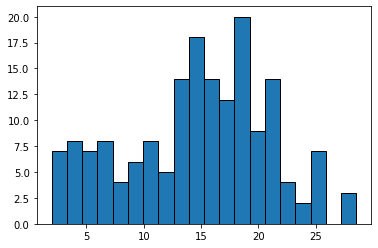

In [54]:
horas = todoporHora.Hora.unique()
print(horas)
h = input('Ingrese una hora válida:')
clima = input('Ingrese estado climático: [Lluvioso, Nublado, Soleado]')
print('\nHistograma',clima,'a la hora',h)
if clima =='Lluvioso':
    h_actual = lluv_por_hora[lluv_por_hora.Hora == h ]['Energia [kWh]']
    plt.hist(h_actual,bins=20,ec ='k')
    
elif clima == 'Nublado':
    h_actual = nub_por_hora[nub_por_hora.Hora == h ]['Energia [kWh]']
    plt.hist(h_actual,bins=20,ec ='k')

elif clima =='Soleado':
    h_actual = sol_por_hora[sol_por_hora.Hora == h ]['Energia [kWh]']
    plt.hist(h_actual,bins=20,ec ='k')         

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2],Temperatura de modulos [C]
6,1/10/2019,12:00,32.266667,439.444167,0 11.66\n1 11.72\n2 11.80\n3...
18,2/10/2019,12:00,37.748333,505.723333,0 11.66\n1 11.72\n2 11.80\n3...
30,3/10/2019,12:00,25.825833,316.009167,0 11.66\n1 11.72\n2 11.80\n3...
42,4/10/2019,12:00,56.354167,784.963333,0 11.66\n1 11.72\n2 11.80\n3...
54,5/10/2019,12:00,27.342500,338.845833,0 11.66\n1 11.72\n2 11.80\n3...
...,...,...,...,...,...
5442,27/12/2020,12:00,18.197500,396.752500,0 12.80\n1 12.76\n2 12.78\n3...
5454,28/12/2020,12:00,28.839167,708.846667,0 12.80\n1 12.76\n2 12.78\n3...
5466,29/12/2020,12:00,14.330000,341.642500,0 12.80\n1 12.76\n2 12.78\n3...
5478,30/12/2020,12:00,7.465000,175.590000,0 12.80\n1 12.76\n2 12.78\n3...


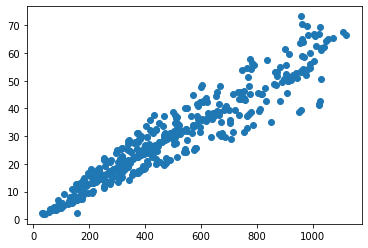

In [94]:
las12 = todoporHora[todoporHora.Hora=='12:00']
plt.scatter(las12['Irradiacion [Wh/m2]'],las12['Energia [kWh]'])
las12

Ingrese una hora válida:12:00


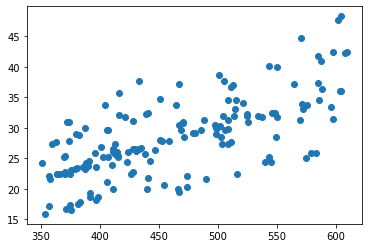

In [97]:
h = input('Ingrese una hora válida:')
h_actual = nub_por_hora[nub_por_hora.Hora == h ]
plt.scatter(h_actual['Irradiacion [Wh/m2]'],h_actual['Energia [kWh]'])

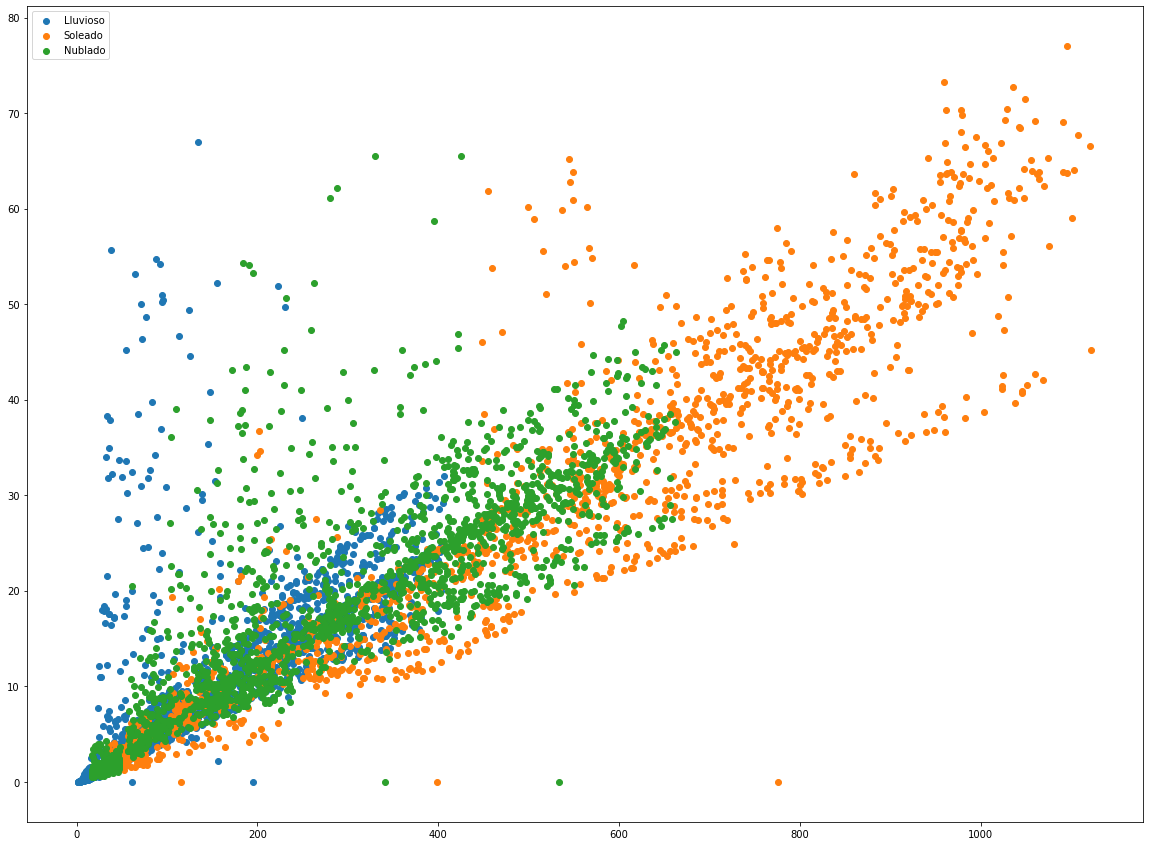

In [70]:
plt.figure(figsize = (20,15))
plt.scatter(lluv_por_hora['Irradiacion [Wh/m2]'],lluv_por_hora['Energia [kWh]'])
plt.scatter(sol_por_hora['Irradiacion [Wh/m2]'],sol_por_hora['Energia [kWh]'])
plt.scatter(nub_por_hora['Irradiacion [Wh/m2]'],nub_por_hora['Energia [kWh]'])
plt.legend(('Lluvioso','Soleado','Nublado'))

'Lluvioso'